# Linear Regression in PyTorch
By [Zahra Taheri](https://github.com/zata213), August 14, 2020

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

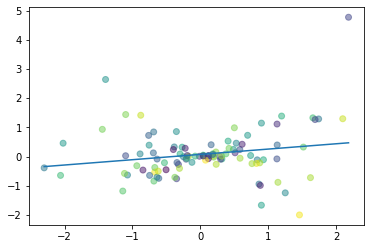

In [2]:
np.random.seed(1)
n=100
x=np.random.randn(n) # A random 1xn array that can be reproduced
y=x*np.random.randn(n)

colors=np.random.rand(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))

plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

Let $y=2x+1$. In the following, we model the latter equation.

In [3]:
# make a dataset
X = [i for i in range(11)]

# convert to numpy array
X_train = np.array(X, dtype=np.float32)
print(X_train)
X_train.shape

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


(11,)

**Important note:** 2D array in required in PyTorch.

In [4]:
# reshape array to 2D
X_train = X_train.reshape(-1,1)
X_train.shape

(11, 1)

In [5]:
# make labels
y = [2*i+1 for i in X]

# convert to numpy array
y_train = np.array(y, dtype=np.float32)
print(y_train)

# reshape array to 2D
y_train = y_train.reshape(-1,1)
y_train.shape

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21.]


(11, 1)

## Linear Regression in PyTorch On CPU

### Building a model 

In [6]:
# create a class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__() #to inherit every things from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        y_pred = self.linear(x) # x from y=2x+1
        return y_pred        

####  Instantiate model class

In [7]:
input_dim = 1 #it means that we pass one x to the modeland receive one output label
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim) #model is an object

####  Instantiate loss class

In [8]:
criterion=nn.MSELoss()

####  Instantiate optimizer class

- Simplified equation for updating parameters is $\theta=\theta-\eta\cdot\nabla_\theta$, where $\theta$ is parameters (our variables, i.e., $\alpha$ and $\beta$ in equation $y=\alpha x+\beta$), $\eta$ is learning rate (how fast we want the model to learn), and $\nabla_\theta$ is parameters' gradients.

In [9]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

### Train the model

In [10]:
epochs=100

In [11]:
for epoch in range(epochs):
    epoch += 1
    # convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(X_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # forward to get output
    predictions = model(inputs)
    
    # calculate loss
    loss = criterion(predictions, labels)
    
    # get gradients w.r.t. parameters
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data))
    

epoch 1, loss 231.965087890625
epoch 2, loss 18.931991577148438
epoch 3, loss 1.555435061454773
epoch 4, loss 0.13795718550682068
epoch 5, loss 0.02221420779824257
epoch 6, loss 0.012651100754737854
epoch 7, loss 0.011749997735023499
epoch 8, loss 0.011556759476661682
epoch 9, loss 0.011422672308981419
epoch 10, loss 0.011294681578874588
epoch 11, loss 0.01116853766143322
epoch 12, loss 0.011043832637369633
epoch 13, loss 0.010920516215264797
epoch 14, loss 0.010798565112054348
epoch 15, loss 0.010677947662770748
epoch 16, loss 0.010558734647929668
epoch 17, loss 0.010440859012305737
epoch 18, loss 0.0103242676705122
epoch 19, loss 0.01020894292742014
epoch 20, loss 0.01009493786841631
epoch 21, loss 0.009982224553823471
epoch 22, loss 0.009870731271803379
epoch 23, loss 0.009760525077581406
epoch 24, loss 0.00965155754238367
epoch 25, loss 0.00954378116875887
epoch 26, loss 0.009437196888029575
epoch 27, loss 0.009331815876066685
epoch 28, loss 0.009227601811289787
epoch 29, loss 0.00

In [12]:
predicted = model(Variable(torch.from_numpy(X_train))).data.numpy()
predicted

array([[ 1.1192706],
       [ 3.1020947],
       [ 5.0849185],
       [ 7.0677423],
       [ 9.050567 ],
       [11.03339  ],
       [13.016214 ],
       [14.999038 ],
       [16.981863 ],
       [18.964685 ],
       [20.94751  ]], dtype=float32)

In [13]:
# y = 2x+1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

### Plot graph

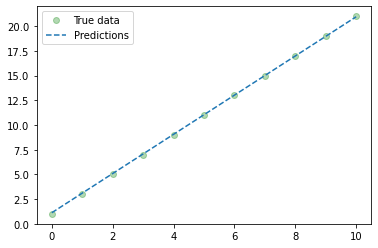

In [14]:
# clear figure
plt.clf()

# get predictions
predicted = model(Variable(torch.from_numpy(X_train))).data.numpy()

# plot true data
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.3)

# plot predictions
plt.plot(X_train, predicted, '--', label='Predictions')

# legend and plot
plt.legend(loc='best')
plt.show()

### Save and load the model

In [15]:
save_model = False #change it to True if you want to save your model
if save_model is True:
    torch.save(model.state_dict(), 'linear_reg_model.pkl')#save only parameters, alpha and beta

In [16]:
load_model = False #change it to True if you want to load your model
if load_model is True:
    model.load_state_dict(torch.load('linear_reg_model.pkl'))

## Linear Regression From CPU to GPU in PyTorch
Building the model, Instantiate the model class, Instantiate the loss class, Instantiate the optimizer class are the same as CPU. Just we should move the model to cuda by the code `model_name.cuda()` and then move the variables to cuda by the code `variable_name.cuda()`.

### Building a model

In [17]:
# create a class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__() #to inherit every things from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        y_pred = self.linear(x) # x from y=2x+1
        return y_pred        

####  Instantiate model class

In [18]:
input_dim = 1 #it means that we pass one x to the modeland receive one output label
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim) #model is an object

In [19]:
#########################
# use GPU for the model #
#########################
if torch.cuda.is_available():
    model.cuda()

####  Instantiate loss class

In [20]:
criterion=nn.MSELoss()

####  Instantiate optimizer class

- Simplified equation for updating parameters is $\theta=\theta-\eta\cdot\nabla_\theta$, where $\theta$ is parameters (our variables, i.e., $\alpha$ and $\beta$ in equation $y=\alpha x+\beta$), $\eta$ is learning rate (how fast we want the model to learn), and $\nabla_\theta$ is parameters' gradients.

In [21]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

### Train the model (on GPU)

In [22]:
epochs=100

In [23]:
for epoch in range(epochs):
    epoch += 1
    
    # convert numpy array to torch Variable
    #########################
    # use GPU for the model #
    #########################
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(X_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(X_train))
        labels = Variable(torch.from_numpy(y_train))
    
    # clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # forward to get output
    predictions = model(inputs)
    
    # calculate loss
    loss = criterion(predictions, labels)
    
    # get gradients w.r.t. parameters
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data))
    

epoch 1, loss 68.62640380859375
epoch 2, loss 5.9003825187683105
epoch 3, loss 0.7806392908096313
epoch 4, loss 0.35969507694244385
epoch 5, loss 0.32205435633659363
epoch 6, loss 0.3157155215740204
epoch 7, loss 0.3119660019874573
epoch 8, loss 0.30846408009529114
epoch 9, loss 0.30501824617385864
epoch 10, loss 0.301611989736557
epoch 11, loss 0.2982439696788788
epoch 12, loss 0.2949133813381195
epoch 13, loss 0.29162007570266724
epoch 14, loss 0.2883637547492981
epoch 15, loss 0.28514334559440613
epoch 16, loss 0.2819594442844391
epoch 17, loss 0.27881085872650146
epoch 18, loss 0.2756972312927246
epoch 19, loss 0.27261871099472046
epoch 20, loss 0.2695744037628174
epoch 21, loss 0.2665640115737915
epoch 22, loss 0.2635873556137085
epoch 23, loss 0.2606441378593445
epoch 24, loss 0.2577333152294159
epoch 25, loss 0.25485533475875854
epoch 26, loss 0.2520093023777008
epoch 27, loss 0.24919529259204865
epoch 28, loss 0.2464127093553543
epoch 29, loss 0.24366074800491333
epoch 30, loss